In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (ema_logging, load_results)
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.feature_scoring import get_feature_scores_all

#turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Random Forests Analysis
This contains a global variance sensitivity analysis of the initial SIR-SEIR model as provided in the assignment. It serves to indicate the input variables of importance by highlighting how sensitive the different outputs of interest are to the input uncertainties using the Random Forests method.

The script first loads an existing data set of arbitrary size (although ideally >100k where k=nr_uncertainties). The feature scoring function then automatically applies the RF algorithm across the data, returning a chart of sensitivities for the specified outcome of interest. This chart is then visualized as a heatmap to highlight important sensitivity relations.

Code largely taken from EMA Workbench online documentation and examples.

In [ ]:
results = load_results(r'./data/category_LHS_1200.tar.gz')

In [4]:
experiments, outcomes = results

x = experiments
y = outcomes['Deceased population']

fs_all = get_feature_scores_all(x, outcomes)
fs_all

,TIME,Deceased population,Infectious population,Recovered population,Susceptible population,Exposed population,Switch SEIR or SIR
Average incubation time,0.0,0.039793,0.118396,0.048370,0.047844,0.266227,0.0
Average infectious period,0.0,0.056371,0.319458,0.083201,0.077608,0.203016,0.0
Basic reproduction number,0.0,0.448835,0.435358,0.698660,0.786905,0.379353,0.0
Case fatality rate,0.0,0.390562,0.022479,0.080252,0.005459,0.033323,0.0
Switch SEIR or SIR,0.0,0.064439,0.104308,0.089518,0.082184,0.118081,1.0
model,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
policy,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


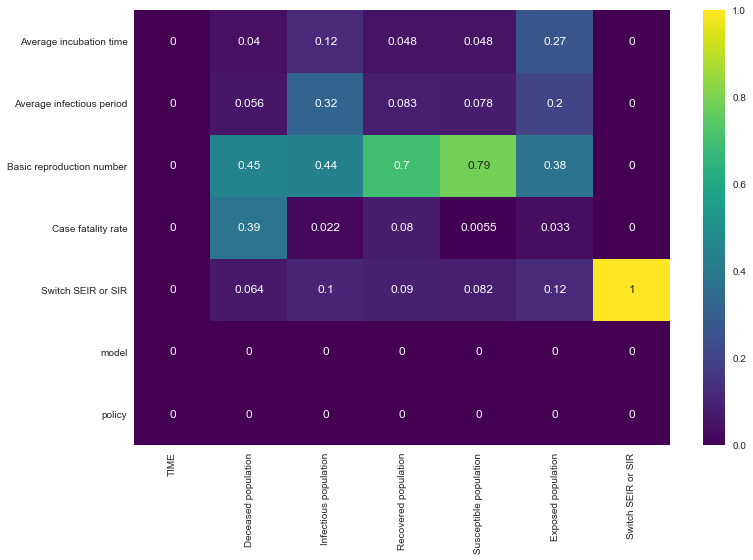

In [5]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(fs_all, annot=True, cmap='viridis')
plt.show()